In [4]:
import requests
import json
import pandas as pd

# Ganti dengan API Key yang kamu dapatkan di Langkah 1
API_KEY = "777cd14ead8f419aed3cb2af6ee7b6c8" 
# Koordinat Yogyakarta (Sekitar Tugu/Titik Nol)
LAT = -7.7956
LON = 110.3695 

# Endpoint untuk mengambil data Cuaca Saat Ini (Current Weather)
# 'units=metric' agar suhu dalam Celsius
url_current = f"https://api.openweathermap.org/data/2.5/weather?lat={LAT}&lon={LON}&appid={API_KEY}&units=metric"

try:
    response = requests.get(url_current)
    response.raise_for_status() # Cek jika ada error koneksi (misal 404/401)
    
    data = response.json()
    
    # Ekstraksi Fitur Kunci untuk Prediksi Hujan
    # Kita harus menyesuaikan nama fitur agar sama dengan data trainingmu
    current_features = {
        'TAVG': data['main']['temp'],
        'RH_AVG': data['main']['humidity'], # Kelembapan (%)
        'FF_AVG': data['wind']['speed'],    # Kecepatan Angin (m/s)
        # Fitur lain yang kamu butuhkan (tekanan, dll.)
    }
    
    df_realtime = pd.DataFrame([current_features])
    print("\n--- DATA REAL-TIME YOGYAKARTA TERKINI ---")
    print(df_realtime)

except requests.exceptions.RequestException as e:
    print(f"Error saat mengambil data: {e}")


--- DATA REAL-TIME YOGYAKARTA TERKINI ---
    TAVG  RH_AVG  FF_AVG
0  29.12      70    2.39


In [13]:
print(df.columns.tolist())


['Tanggal', 'Suhu Minimum (°C)', 'Suhu Maksimum (°C)', 'Suhu Rata-rata (°C)', 'Kelembaban Rata-rata (%)', 'Lama Penyinaran (jam)', 'Kecepatan Angin Rata-rata (knot)', 'Kecepatan Angin Terbesar (knot)', 'Arah Angin Saat Kecepatan Maksimum (deg)', 'Curah Hujan (mm)', 'Kategori Hujan (num)', 'Arah Angin Terbanyak (deg)', 'Curah Hujan (Kategori)']


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Load dataset
df = pd.read_csv('prediksi hujan DIY/fore.csv')
df.columns = df.columns.str.strip()

# Fitur & Target
features = [
    'Suhu Rata-rata (°C)',
    'Kelembaban Rata-rata (%)',
    'Lama Penyinaran (jam)',
    'Kecepatan Angin Rata-rata (knot)'
]

target = 'Kategori Hujan (num)'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Training model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Simpan model
with open('model_prediksi_hujan_DYI.pkl', 'wb') as f:
    pickle.dump(model, f)

print("\nModel berhasil disimpan ✅")


Accuracy: 64.65%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       447
           1       0.47      0.49      0.48       199
           2       0.28      0.09      0.14        54
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00         2

    accuracy                           0.65       727
   macro avg       0.30      0.28      0.28       727
weighted avg       0.61      0.65      0.63       727


Model berhasil disimpan ✅


/home/nadiah/yes/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nadiah/yes/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nadiah/yes/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [1]:
import requests
import json
import pandas as pd
import pickle
import time # Untuk mendapatkan waktu prediksi

# --- KONFIGURASI ---
# GANTI DENGAN API KEY OWM MILIKMU
API_KEY = "777cd14ead8f419aed3cb2af6ee7b6c8" 
# Koordinat Yogyakarta (Stasiun Klimatologi / dekat pusat kota)
LAT = -7.7956
LON = 110.3695 

# Nama file model yang sudah kamu simpan
MODEL_FILE = 'model_prediksi_hujan_DYI.pkl' 

# Nama fitur yang HARUS SAMA PERSIS dengan saat TRAINING model
FEATURE_NAMES = [
    'Suhu Rata-rata (°C)',
    'Kelembaban Rata-rata (%)',
    'Lama Penyinaran (jam)',
    'Kecepatan Angin Rata-rata (knot)'
]
# --- END KONFIGURASI ---

def get_latest_weather_data(api_key, lat, lon):
    """Mengambil data cuaca terkini dari OpenWeatherMap API."""
    
    # Endpoint untuk Current Weather
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric"
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        
        # Ekstraksi Data (Sesuaikan satuan dan nama fitur)
        latest_data = {
            'Suhu Rata-rata (°C)': data['main']['temp'],
            'Kelembaban Rata-rata (%)': data['main']['humidity'],
            # OWM tidak menyediakan Lama Penyinaran (SS) secara default,
            # kita asumsikan 5 jam (rata-rata) untuk sementara.
            # CATATAN: Fitur ini perlu penyesuaian di data training.
            'Lama Penyinaran (jam)': 5.0, 
            # OWM memberi dalam m/s, kita konversi ke knot (1 m/s = 1.944 knot)
            'Kecepatan Angin Rata-rata (knot)': data['wind']['speed'] * 1.944 
        }
        
        # Mengubah data ke format DataFrame (Baris tunggal)
        df_realtime = pd.DataFrame([latest_data])
        df_realtime = df_realtime[FEATURE_NAMES] # Pastikan urutan kolom sama
        return df_realtime, data.get('dt', time.time())
        
    except requests.exceptions.RequestException as e:
        print(f"[ERROR] Gagal mengambil data OWM: {e}")
        return None, None
    except KeyError as e:
        print(f"[ERROR] Data tidak lengkap dari OWM: {e}")
        return None, None


def run_realtime_prediction():
    """Memuat model dan melakukan prediksi."""
    
    # 1. Muat Model (Load Model)
    try:
        with open(MODEL_FILE, 'rb') as f:
            model = pickle.load(f)
        print(f"Model '{MODEL_FILE}' berhasil dimuat.")
    except FileNotFoundError:
        print(f"[FATAL] Model file '{MODEL_FILE}' tidak ditemukan.")
        return

    # 2. Ambil Data Real-Time
    df_predict, timestamp = get_latest_weather_data(API_KEY, LAT, LON)
    
    if df_predict is None:
        return

    # 3. Lakukan Prediksi
    # Karena model dilatih untuk 5 kelas (0, 1, 2, 3, 4)
    prediction = model.predict(df_predict)[0]
    
    # Probabilitas (confidence score)
    proba = model.predict_proba(df_predict)[0]
    confidence = proba[prediction] * 100
    
    # --- HASIL ---
    # Mapping Kelas ke Keterangan Cuaca
    class_mapping = {
        0: "TIDAK HUJAN (Cerah/Berawan)",
        1: "HUJAN RINGAN",
        2: "HUJAN SEDANG",
        3: "HUJAN LEBAT",
        4: "HUJAN SANGAT LEBAT"
    }

    waktu_prediksi = time.strftime('%A, %d %B %Y - %H:%M:%S WIB', time.localtime(timestamp))
    
    print("\n==============================================")
    print("      HASIL PREDIKSI HUJAN REAL-TIME DIY")
    print("==============================================")
    print(f"Waktu Data OWM: {waktu_prediksi}")
    print(f"Input Data: {df_predict.to_dict(orient='records')[0]}")
    print("----------------------------------------------")
    print(f"PREDIKSI: {class_mapping.get(prediction, 'Kelas tidak dikenal')}")
    print(f"KEYAKINAN MODEL: {confidence:.2f}%")
    print("==============================================\n")


# Jalankan fungsi utama
if __name__ == "__main__":
    run_realtime_prediction()

Model 'model_prediksi_hujan_DYI.pkl' berhasil dimuat.

      HASIL PREDIKSI HUJAN REAL-TIME DIY
Waktu Data OWM: Monday, 22 December 2025 - 05:25:38 WIB
Input Data: {'Suhu Rata-rata (°C)': 25.23, 'Kelembaban Rata-rata (%)': 96, 'Lama Penyinaran (jam)': 5.0, 'Kecepatan Angin Rata-rata (knot)': 1.49688}
----------------------------------------------
PREDIKSI: HUJAN SEDANG
KEYAKINAN MODEL: 38.00%



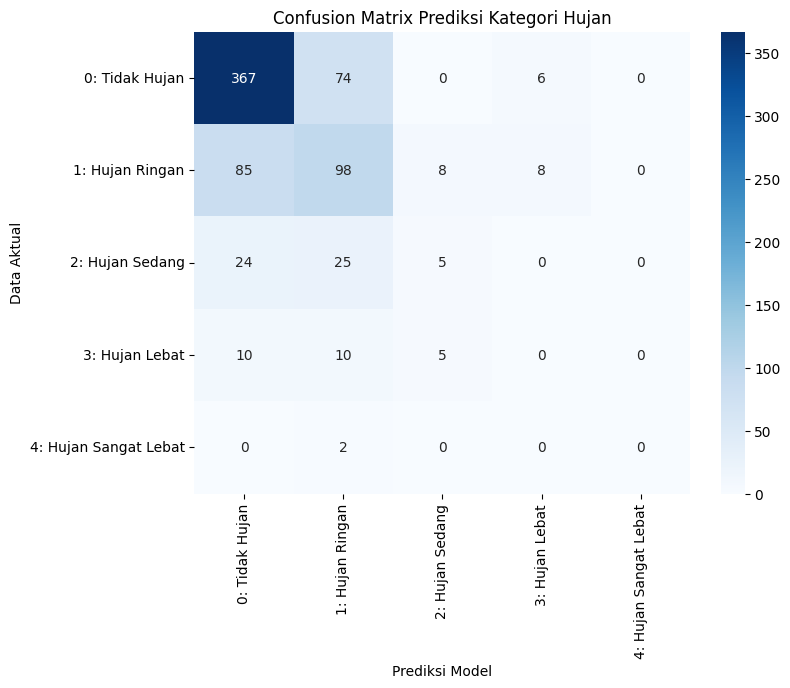

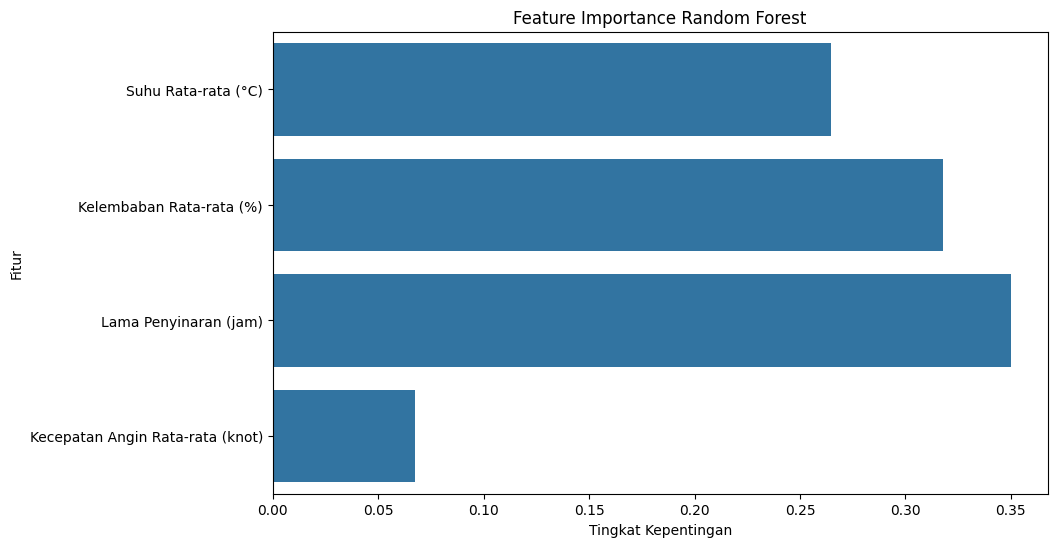

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle

# ===============================
# 1. LOAD DATA
# ===============================
df = pd.read_csv('prediksi hujan DIY/fore.csv')
df.columns = df.columns.str.strip()

FEATURE_NAMES = [
    'Suhu Rata-rata (°C)',
    'Kelembaban Rata-rata (%)',
    'Lama Penyinaran (jam)',
    'Kecepatan Angin Rata-rata (knot)'
]

TARGET = 'Kategori Hujan (num)'

X = df[FEATURE_NAMES]
y = df[TARGET]

# ===============================
# 2. SPLIT ULANG DATA
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================
# 3. LOAD MODEL
# ===============================
with open('model_prediksi_hujan_DYI.pkl', 'rb') as f:
    model = pickle.load(f)

# ===============================
# 4. PREDIKSI
# ===============================
y_pred = model.predict(X_test)

CLASS_LABELS = [
    '0: Tidak Hujan',
    '1: Hujan Ringan',
    '2: Hujan Sedang',
    '3: Hujan Lebat',
    '4: Hujan Sangat Lebat'
]

# ===============================
# 5. CONFUSION MATRIX
# ===============================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=CLASS_LABELS,
    yticklabels=CLASS_LABELS
)
plt.title('Confusion Matrix Prediksi Kategori Hujan')
plt.xlabel('Prediksi Model')
plt.ylabel('Data Aktual')
plt.show()

# ===============================
# 6. FEATURE IMPORTANCE
# ===============================
importances = model.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(
    x=importances,
    y=FEATURE_NAMES
)
plt.title('Feature Importance Random Forest')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.show()
